## Problem statement

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 


The steps to be performed for the first task are given below.

- Exploratory data analysis
- Data cleaning
- Text preprocessing
- Feature extraction: In order to extract features from the text data, you may choose from any of the methods, including bag-of-words, TF-IDF vectorization or word embedding.
- Training a text classification model: You need to build at least three ML models. You then need to analyse the performance of each of these models and choose the best model. At least three out of the following four models need to be built (Do not forget, if required, handle the class imbalance and perform hyperparameter tuning.). 
    1. Logistic regression
    2. Random forest
    3. XGBoost
    4. Naive Bayes

Out of these four models, you need to select one classification model based on its performance.

Building a recommendation system
As you learnt earlier, you can use the following types of recommendation systems.
1. User-based recommendation system
2. Item-based recommendation system

Your task is to analyse the recommendation systems and select the one that is best suited in this case. 

Once you get the best-suited recommendation system, the next task is to recommend 20 products that a user is most likely to purchase based on the ratings. <br/>

You can use the 'reviews_username' (one of the columns in the dataset) to identify your user. 
- Improving the recommendations using the sentiment analysis model

Now, the next task is to link this recommendation system with the sentiment analysis model that was built earlier (recall that we asked you to select one ML model out of the four options). Once you recommend 20 products to a particular user using the recommendation engine, you need to filter out the 5 best products based on the sentiments of the 20 recommended product reviews. 

In this way, you will get an ML model (for sentiments) and the best-suited recommendation system. 



# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import re
import nltk
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from wordcloud import WordCloud

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

In [4]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [5]:
import pickle

import warnings
warnings.simplefilter("ignore")

In [6]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mohit.dubey/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohit.dubey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohit.dubey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mohit.dubey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mohit.dubey/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
from sklearn.linear_model import LogisticRegression
import time

In [8]:
import Utility
import TextPreProcessing
import ModelFactory

In [9]:
pd.set_option('display.max_colwidth', None)

# Load Data from Sample file and Meta file

### Load the Metadata of Ebuss DF

In [10]:
ebuss_meta = pd.read_csv("dataset/Data+Attribute+Description.csv",  encoding='latin1')
ebuss_meta

,Attribute,Attribute Description
0,id,Uniques identity number to identify each unique review given by the user to a particular product in the dataset
1,brand,Name of the brand of the product to which user has given review and rating
2,categories,"Category of the product like household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products, health care products and many more."
3,manufacturer,Name of the manufacturer of the product
4,name,Name of the product to which user has added review or rating
5,reviews_date,Date on which the review has been added by the user
6,reviews_didPurchase,Whether a particular user has purchased the product or not
7,reviews_doRecommend,Whether a particular user has recommended the product or not
8,reviews_rating,Rating given by the user to a particular product
9,reviews_text,Review given by the user to a particular product


### Load the Ebuss Data in the dataframe

In [11]:
ebuss_df = pd.read_csv("dataset/sample30.csv")
ebuss_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


In [12]:
ebuss_df.shape

(30000, 15)

In [13]:
ebuss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [14]:
ebuss_df.nunique()

id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64

In [15]:
Utility.get_missing_value_percentage(ebuss_df)

,missing_percentage
reviews_userProvince,99.433
reviews_userCity,93.570
reviews_didPurchase,46.893
reviews_doRecommend,8.567
reviews_title,0.633
manufacturer,0.470
reviews_username,0.210
reviews_date,0.153
user_sentiment,0.003
id,0.000


### **Observations**
- Total rows - `30000`
- Total Categories - `270`
- Total unique users in reviews - `24914`
- `reviews_didPurchase`, `reviews_userCity` and `reviews_userProvince` has more than `40%` of missing values

## **Missing value treatment**

In [16]:
Utility.get_missing_value_percentage(ebuss_df)

,missing_percentage
reviews_userProvince,99.433
reviews_userCity,93.570
reviews_didPurchase,46.893
reviews_doRecommend,8.567
reviews_title,0.633
manufacturer,0.470
reviews_username,0.210
reviews_date,0.153
user_sentiment,0.003
id,0.000


### Drop the columns with more than 40% of missing values

In [17]:
ebuss_df.drop(columns=["reviews_userProvince", "reviews_userCity", "reviews_didPurchase"],inplace=True)

In [18]:
Utility.get_missing_value_percentage(ebuss_df)

,missing_percentage
reviews_doRecommend,8.567
reviews_title,0.633
manufacturer,0.470
reviews_username,0.210
reviews_date,0.153
user_sentiment,0.003
id,0.000
brand,0.000
categories,0.000
name,0.000


In [19]:
round(ebuss_df[["reviews_doRecommend"]].value_counts(normalize=True) * 100, 2)

reviews_doRecommend
True                   94.35
False                   5.65
Name: proportion, dtype: float64

As this `reviews_doRecommend` is skewed and will not help in analysis, we should drop this column

In [20]:
ebuss_df_clean = ebuss_df.drop(columns=['reviews_doRecommend'])

In [21]:
Utility.get_missing_value_percentage(ebuss_df_clean)

,missing_percentage
reviews_title,0.633
manufacturer,0.470
reviews_username,0.210
reviews_date,0.153
user_sentiment,0.003
id,0.000
brand,0.000
categories,0.000
name,0.000
reviews_rating,0.000


### Treating nil values
- `reviews_title` has only 0.6% of nil values. Replacing the the value with `unknown`
- `reviews_username` has only 0.2% of nil values. Replacing the the value with `unknown`

In [22]:
ebuss_df_clean['reviews_title'].fillna('unknown',inplace=True)
ebuss_df_clean['reviews_username'].fillna('unknown',inplace=True)


In [23]:
Utility.get_missing_value_percentage(ebuss_df_clean)

,missing_percentage
manufacturer,0.470
reviews_date,0.153
user_sentiment,0.003
id,0.000
brand,0.000
categories,0.000
name,0.000
reviews_rating,0.000
reviews_text,0.000
reviews_title,0.000


#### **Manufacturer column cleaning**

In [24]:
# Calculate the categories of different manufacturers
round(ebuss_df_clean['manufacturer'].value_counts(normalize=True) * 100,3)

manufacturer
Clorox                                28.621
Test                                  11.136
AmazonUs/CLOO7                         6.829
L'oreal Paris                          4.126
Walt Disney                            3.828
                                       ...  
Pacific Foods of Oregon, Inc.          0.003
Unfi                                   0.003
Herr's                                 0.003
Southern Enterprises                   0.003
Universal Music Group / Cash Money     0.003
Name: proportion, Length: 227, dtype: float64

In [25]:
top_manufacturers = Utility.get_columns_with_cumfreq(ebuss_df_clean, "manufacturer", 0.95)

**Get the count of total manufacturers and print the first 10**

In [26]:
len(top_manufacturers), top_manufacturers[:10]

(54,
 ['Clorox',
  'Test',
  'AmazonUs/CLOO7',
  "L'oreal Paris",
  'Walt Disney',
  "Burt's Bees",
  'SONY CORP',
  'Twentieth Century Fox',
  'P&G',
  'Nexxus Beauty Products'])

In [27]:
# all the levels below 95 percentage are assgined to a single level called others
# get rows for levels which are not present in top_manufacturer_list
ebuss_new_df = ebuss_df_clean[~ebuss_df_clean['manufacturer'].isin(top_manufacturers)]

# replace the value of these levels to others
ebuss_new_df['manufacturer'] = "others"

# get rows for levels which are present in list_platform
ebuss_old_df = ebuss_df_clean[ebuss_df_clean['manufacturer'].isin(top_manufacturers)]

# concatenate new_df and old_df to get the final dataframe
ebuss_df_clean_updated = pd.concat([ebuss_new_df, ebuss_old_df])

In [28]:
Utility.get_missing_value_percentage(ebuss_df_clean_updated)

,missing_percentage
reviews_date,0.153
user_sentiment,0.003
id,0.000
brand,0.000
categories,0.000
manufacturer,0.000
name,0.000
reviews_rating,0.000
reviews_text,0.000
reviews_title,0.000


In [29]:
#converting 'reviews_date' to date time object
ebuss_df_clean_updated["reviews_date"] = pd.to_datetime(ebuss_df_clean_updated["reviews_date"], errors='coerce')
ebuss_df_clean_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                30000 non-null  object             
 1   brand             30000 non-null  object             
 2   categories        30000 non-null  object             
 3   manufacturer      30000 non-null  object             
 4   name              30000 non-null  object             
 5   reviews_date      29255 non-null  datetime64[ns, UTC]
 6   reviews_rating    30000 non-null  int64              
 7   reviews_text      30000 non-null  object             
 8   reviews_title     30000 non-null  object             
 9   reviews_username  30000 non-null  object             
 10  user_sentiment    29999 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(9)
memory usage: 2.7+ MB


**Dropping the rows with nil `reviews_date` values as they are just 0.15% of the total records**

In [30]:
ebuss_df_clean_updated = ebuss_df_clean_updated[~ ebuss_df_clean_updated['reviews_date'].isna()]

In [31]:
Utility.get_missing_value_percentage(ebuss_df_clean_updated)

,missing_percentage
user_sentiment,0.003
id,0.000
brand,0.000
categories,0.000
manufacturer,0.000
name,0.000
reviews_date,0.000
reviews_rating,0.000
reviews_text,0.000
reviews_title,0.000


In [32]:
round(ebuss_df_clean_updated.user_sentiment.value_counts(normalize=True) * 100, 2)

user_sentiment
Positive    88.8
Negative    11.2
Name: proportion, dtype: float64

As aroud `88%` of the `user_sentiment` is `postive`, we will assign `positive` to missing user_sentiment rows

In [33]:
ebuss_df_clean_updated['user_sentiment'].fillna('Positive', inplace=True)

In [34]:
Utility.get_missing_value_percentage(ebuss_df_clean_updated)

,missing_percentage
id,0.0
brand,0.0
categories,0.0
manufacturer,0.0
name,0.0
reviews_date,0.0
reviews_rating,0.0
reviews_text,0.0
reviews_title,0.0
reviews_username,0.0


### Observations
- a
- b
- c

### Analyse the Values imbalance in the dataframe

#### `user_sentiment`

In [35]:
ebuss_df_clean_updated = ebuss_df_clean_updated[-ebuss_df_clean_updated.user_sentiment.isnull()]


In [36]:
ebuss_df_clean_updated['user_sentiment'] = ebuss_df_clean_updated['user_sentiment'].map({'Positive':1,'Negative':0})

In [37]:
# #get the value count of user_sentiments column
round(ebuss_df_clean_updated["user_sentiment"].value_counts(normalize=True) * 100, 2)

user_sentiment
1    88.8
0    11.2
Name: proportion, dtype: float64

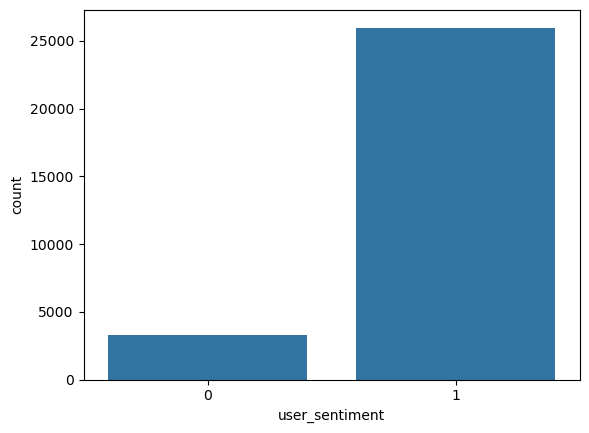

In [38]:
sns.countplot(x='user_sentiment', data = ebuss_df_clean_updated)
plt.show()

### `reviews_rating`

In [39]:
round(ebuss_df_clean_updated["reviews_rating"].value_counts(normalize=True) * 100, 2)

reviews_rating
5    69.49
4    20.23
1     4.51
3     4.45
2     1.33
Name: proportion, dtype: float64

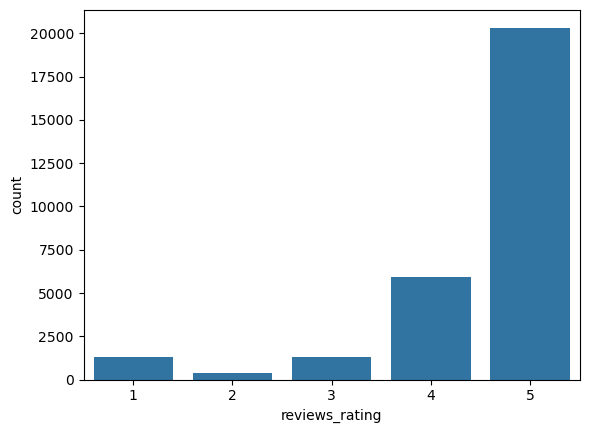

In [40]:
sns.countplot(x='reviews_rating', data = ebuss_df_clean_updated)
plt.show()

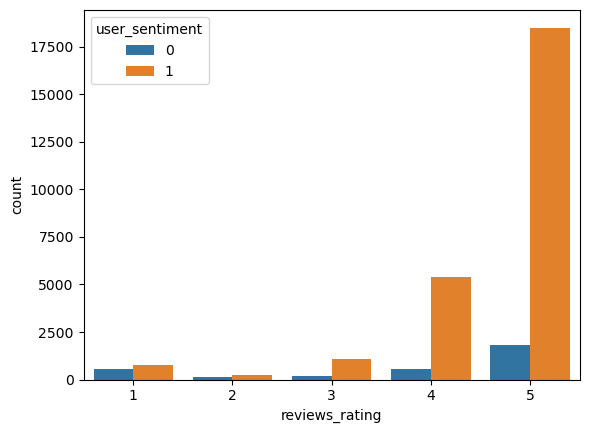

In [41]:
sns.countplot(x='reviews_rating', data = ebuss_df_clean_updated, hue="user_sentiment")
plt.show()

**Ratings of users with negative sentiment**

In [42]:
round(ebuss_df_clean_updated[ebuss_df_clean_updated["user_sentiment"] == 0]["reviews_rating"].value_counts(normalize=True) * 100, 2)

reviews_rating
5    55.69
1    17.33
4    16.48
3     6.50
2     4.00
Name: proportion, dtype: float64

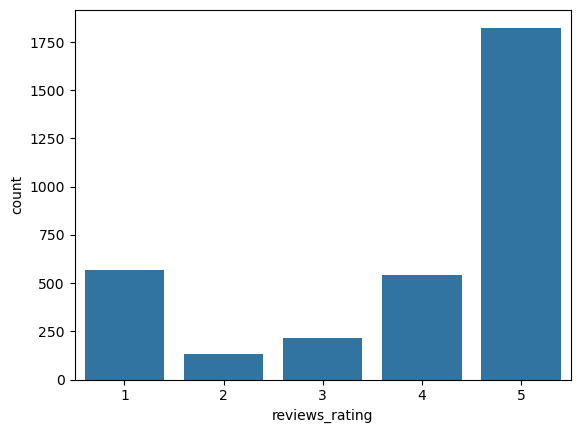

In [43]:
sns.countplot(x='reviews_rating', data = ebuss_df_clean_updated[ebuss_df_clean_updated["user_sentiment"] == 0])
plt.show()

In [44]:
ebuss_df_clean_updated[ebuss_df_clean_updated["user_sentiment"] == 0]["reviews_rating"].describe()

count    3277.000000
mean        3.891974
std         1.526702
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: reviews_rating, dtype: float64

**Movies with review rating more than or equal to 4 but negative user sentiments**

In [45]:
print(ebuss_df_clean_updated[(ebuss_df_clean_updated["user_sentiment"] == 0) & (ebuss_df_clean_updated["reviews_rating"] >= 4)].shape)
ebuss_df_clean_updated[(ebuss_df_clean_updated["user_sentiment"] == 0) & (ebuss_df_clean_updated["reviews_rating"] >= 4)][["name", "reviews_title", "reviews_text", "reviews_rating"]].sample(10)


(2365, 11)


,name,reviews_title,reviews_text,reviews_rating
2333,Mike Dave Need Wedding Dates (dvd + Digital),Ultimately funny,Totally not what I expected and funnier then what I thought it was. A need to see movie!!!,5
7390,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,I love these wipes,I like these wipes because they're sturdy and convenient. This review was collected as part of a promotion.,4
16379,"Burt's Bees Lip Shimmer, Raisin",perfect mix of color and moisture!,"I was always told to wear lipstick, but I hated the feel of lipstick, and the stickiness of lip gloss so this was a god sent! I reccomend it to everyone and anyone!it makes my lips so soft and supple and gives the perfect look of natural and subtle color and shine. my favorites are watermelon and peony.",5
10350,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Mrs. Messy,Seriously there's no better cleanser to get any tough job done. Make sure to follow the instructions. This review was collected as part of a promotion.,5
28101,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),Grandkids love the movie,Have not seen it yet. I can not review the movie myself.,5
12661,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Gets rooms cleaner then clean,I always use in bathroom and finishing wipe in kitchen This review was collected as part of a promotion.,5
6869,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Good Product,I love the scent and how convenient they are to use! I do with they wouldn't streak so badly though:( This review was collected as part of a promotion.,4
1245,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",They Put A Sparkle In My Life,"I RECENTLY USED FINISH QUANTUM FOR THE FIRST TIME AFTER I FOUND SOME OTHER DISHWASHER TABLETS LEFT STREAKS ON MY GLASSES/PLATES AND I WOULD END UP HAVING TO SPEND LONGER HAND WASHING THEM AGAIN, BUT FINISH QUANTUM DIDN'T ONLY LEAVE MY PLATES/GLASSES SPARKLING BUT ALSO MY PREVIOUSLY TIRED EYES ALSO HAD A NEW SPARKLE IN THEM!",5
21960,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Nice,Soothing soap,5
11909,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Clean,I only use Clorox products to disinfect areas in my home. My mother used Clorox in the wash to further whiten the whites and I kinda of grew up with this product. Clorox is part of my cleaning routine. This review was collected as part of a promotion.,5


**Ratings of users with positive sentiment**

In [46]:
round(ebuss_df_clean_updated[ebuss_df_clean_updated["user_sentiment"] == 1]["reviews_rating"].value_counts(normalize=True) * 100, 2)

reviews_rating
5    71.23
4    20.70
3     4.20
1     2.89
2     0.99
Name: proportion, dtype: float64

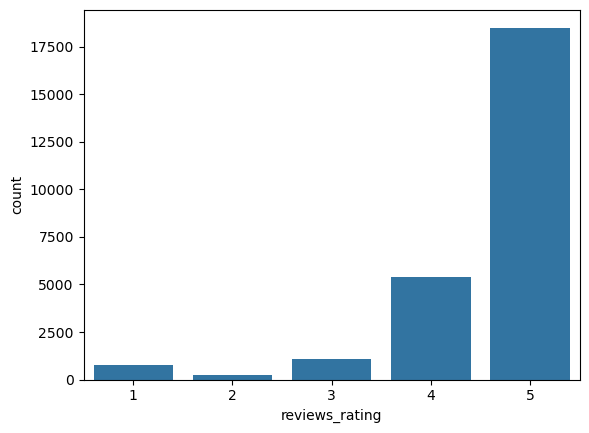

In [47]:
sns.countplot(x='reviews_rating', data = ebuss_df_clean_updated[ebuss_df_clean_updated["user_sentiment"] == 1])
plt.show()

In [48]:
ebuss_df_clean_updated[ebuss_df_clean_updated["user_sentiment"] == 1]["reviews_rating"].describe()

count    25978.00000
mean         4.56390
std          0.85771
min          1.00000
25%          4.00000
50%          5.00000
75%          5.00000
max          5.00000
Name: reviews_rating, dtype: float64

**Movies with review rating less than 4 but positive user sentiments**

In [49]:
print(ebuss_df_clean_updated[(ebuss_df_clean_updated["user_sentiment"] == 1) & (ebuss_df_clean_updated["reviews_rating"] < 3)].shape)
ebuss_df_clean_updated[(ebuss_df_clean_updated["user_sentiment"] == 1) & (ebuss_df_clean_updated["reviews_rating"] < 3)][["name", "reviews_title", "reviews_text", "reviews_rating"]].sample(10)


(1007, 11)


,name,reviews_title,reviews_text,reviews_rating
21345,Nexxus Exxtra Gel Style Creation Sculptor,Not as good as before - I have moved on,Not nearly as good as before. The scent is not good. The gel seems runnier and does not hold as well. Just bring back the old formula!!!! I would switch back if I could get the old gel!!!! For now I have moved on to a better product.,1
15767,"Burt's Bees Lip Shimmer, Raisin",color-less,"Love the Lip Shimmer feel, but the color I bought (Grapefruit) didn't give me the light pink color I was after. Instead, my lips looked white and pasty. Had to throw it out.",2
18430,L'oreal Paris Advanced Hairstyle Boost It High Lift Creation Spray,"Great product, faulty spray can","I'm glad to see I'm not the only one with this problem. I keep purchasing this product in the hopes that it will work until the can is empty. I've returned two some months ago and took a chance and purchased a third one. Today it finally quit spraying even though I tried running it under hot water thinking the nozzle was clogged. Can't imagine what the problem is but I do hope it can be resolved, soon. I do like this product.",1
21404,Nexxus Exxtra Gel Style Creation Sculptor,Please bring the old exxtra gel back!,I loved the old formula and used it every day. Tried to use the new one and tossed it after a couple of times. It's so bad for my hair type that I couldn't even finish the tube! I won't buy anymore Nexxus products unless the old formula or something similar comes back.,1
22211,Alex Cross (dvdvideo),Atrocious casting,"Idris Elba was originally cast in the lead role. Apparently before the budget was cut dramatically. Had they stuck with that decision, this film could have been a great deal better. As it is, Tyler Perry is awful as the lead. Every scene with him speaking made me cringe. I knew this movie was a throw away when I read a producer's quote (after switching from Idris to Tyler) that said, ""if you can get Will Smith or Tyler Perry, you do it""... Like Perry is in the same league as Will Smith when it comes to mass market, big budget films. Yes, he's had a fair amount of success, but in a very narrow range of film types.",1
21690,Nexxus Exxtra Gel Style Creation Sculptor,Horrible!,"As I'm sure you know by now, and comments by your company indicate, you will be bringing back the old formula because the vast majority of folks thinks your new version is terrible and unless this is changes soon, you will loose decades old customers including myself. My question is when should we see this--You need to get on it and make this happen very quickly.",1
22366,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Horrible shampoo now,Am very displeased with the new formula. The scent doesn't last in my hair like before. I wished you all would switch back to the old formula or make both so we can choose which one we want to buy,1
21385,Nexxus Exxtra Gel Style Creation Sculptor,Disappointed,"I have been using this product for over 10 yrs. I have thick, curly hair and seems like this WAS the only gel that worked. I have three bottles at home of the new packaging but it seems not only did you change the packaging but you changed the gel. It does not hold my hair at all and doesn't even feel like I have gel in. I will be returning my unopened bottles and will be looking for a new gel to use!!!",1
26261,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Buy the DVD instead,Like others have commented the quality of the transfer was not that great. Probably could have gotten just the same quality from a upscaled DVD. Also like one of the other posters said you have to turn on subtitles otherwise you don't know what is going on through half the movie. The DVD automatically subtitles the foreign language parts while this one doesn't. Basically I wish I hadn't spent $10 on it.,1
21575,Nexxus Exxtra Gel Style Creation Sculptor,New Formula Is Not Great,"I am so sad that nexxus changed their extragel. I have been using this gel

In [50]:
pd.crosstab(ebuss_df_clean_updated["user_sentiment"], ebuss_df_clean_updated["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,568,131,213,540,1825,3277
1,750,257,1090,5378,18503,25978
All,1318,388,1303,5918,20328,29255


In [51]:
ebuss_df_clean_updated.loc[(ebuss_df_clean_updated["user_sentiment"]==1) & (ebuss_df_clean_updated["reviews_rating"]<4), "user_sentiment"] = 0
ebuss_df_clean_updated.loc[(ebuss_df_clean_updated["user_sentiment"]==0) & (ebuss_df_clean_updated["reviews_rating"]>=4), "user_sentiment"] = 1


In [52]:
pd.crosstab(ebuss_df_clean_updated["user_sentiment"], ebuss_df_clean_updated["reviews_rating"], margins=True)


reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,1318,388,1303,0,0,3009
1,0,0,0,5918,20328,26246
All,1318,388,1303,5918,20328,29255


#### `reviews_doRecommend`

In [53]:
# round(ebuss_df_clean_updated["reviews_doRecommend"].value_counts(normalize=True) * 100, 2)

In [54]:
# sns.countplot(x='reviews_doRecommend', data = ebuss_df_clean_updated)
# plt.show()

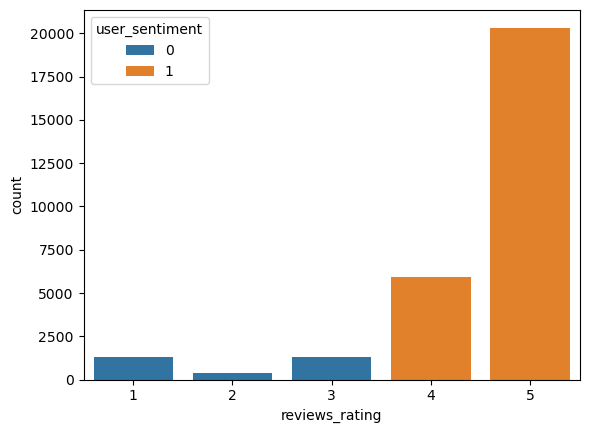

In [55]:
sns.countplot(x='reviews_rating', data = ebuss_df_clean_updated, hue="user_sentiment")
plt.show()

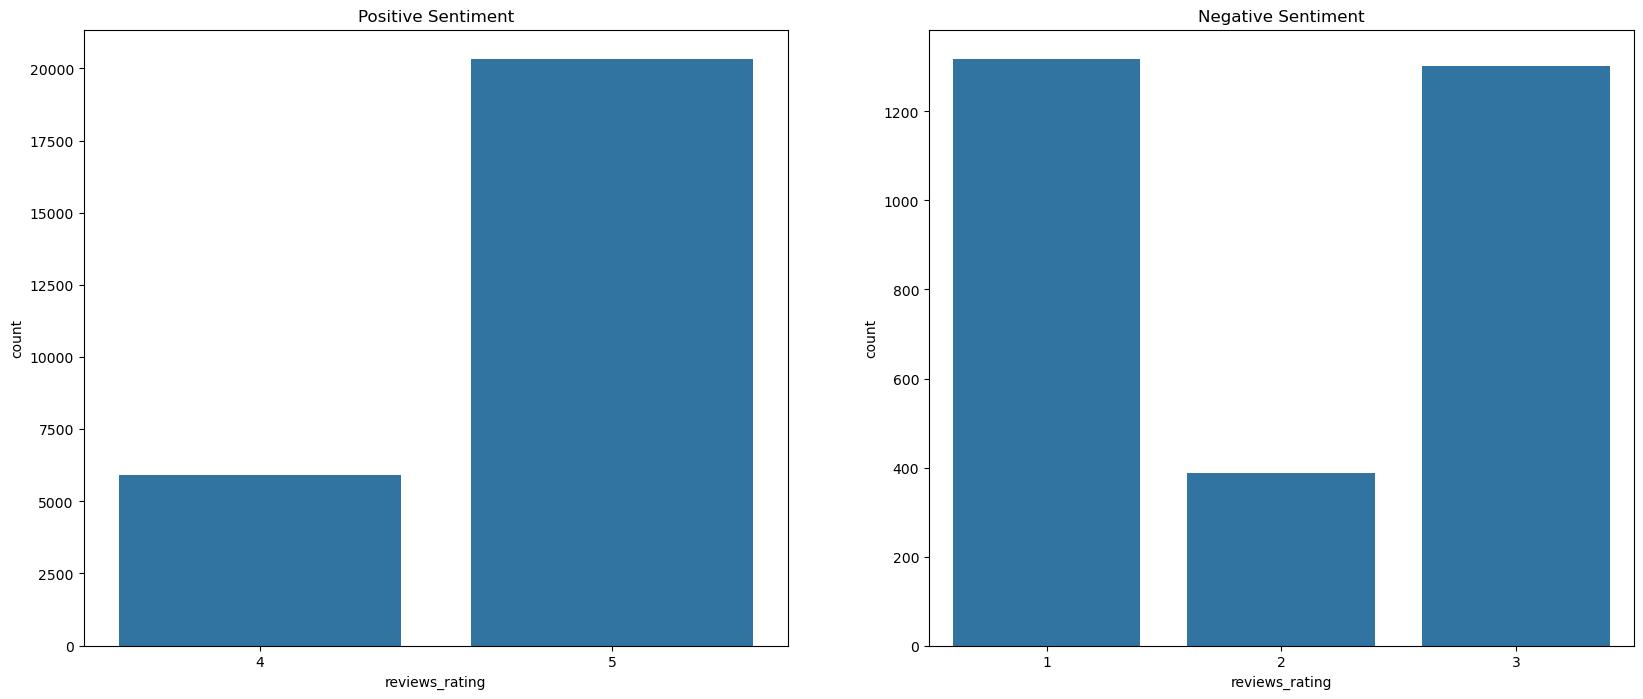

In [56]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.title.set_text("Positive Sentiment")
sns.countplot(x='reviews_rating', data = ebuss_df_clean_updated[ebuss_df_clean_updated["user_sentiment"] == 1], ax=ax1)
ax2.title.set_text("Negative Sentiment")
sns.countplot(x='reviews_rating', data = ebuss_df_clean_updated[ebuss_df_clean_updated["user_sentiment"] == 0], ax=ax2)
plt.show()

In [57]:
round(ebuss_df_clean_updated.user_sentiment.value_counts(normalize=True) * 100, 2)

user_sentiment
1    89.71
0    10.29
Name: proportion, dtype: float64

### **Understand the brand column**

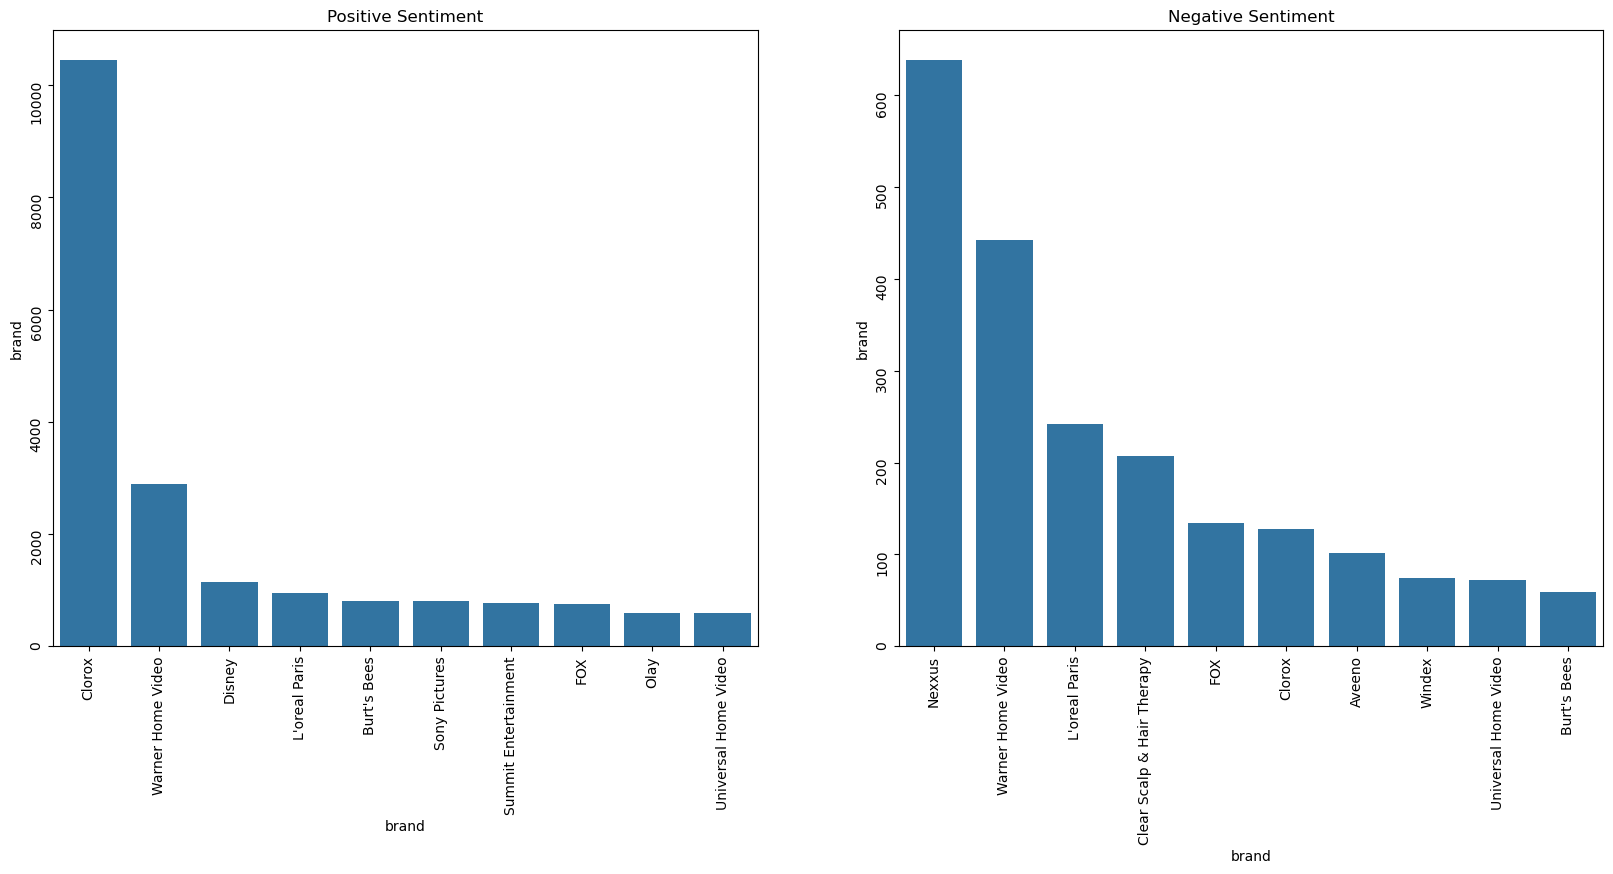

In [58]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
# plt.xticks(rotation=90)

# Filter the top 10 brands among the positive sentiments
sns.barplot(data=ebuss_df_clean_updated[ebuss_df_clean_updated['user_sentiment']==1].groupby('brand')['brand'].count().sort_values(ascending=False)[:10], ax=ax1)
ax1.tick_params(labelrotation=90)
ax1.title.set_text("Positive Sentiment")

sns.barplot(data=ebuss_df_clean_updated[ebuss_df_clean_updated['user_sentiment']==0].groupby('brand')['brand'].count().sort_values(ascending=False)[:10], ax=ax2)
ax2.title.set_text("Negative Sentiment")
ax2.tick_params(labelrotation=90)

plt.show()

# Filter the top 10 brands among the positive sentiments
# ebuss_df_clean_updated[ebuss_df_clean_updated['user_sentiment']==1].groupby('brand')['brand'].count().sort_values(ascending=False)[:10]


### Observation
- Clorox brand has the maximum positive reviews
- Nexxus brand has the maximum negative reviews

### **Item level user sentiment**

In [59]:
def filter_products(df, productId, pos=1):
    review_count = df[(df.id==productId) & (df.user_sentiment==pos)]['brand'].count()
    return review_count

In [60]:
#group the dataframe by product id and view the # of pos review / neg reviews count
ebuss_custom =  ebuss_df_clean_updated.groupby('id', as_index=False)['user_sentiment'].count()
ebuss_custom["pos_review_count"] =  ebuss_custom.id.apply(lambda id: filter_products(ebuss_df_clean_updated, id, 1))
ebuss_custom["neg_review_count"] =  ebuss_custom.id.apply(lambda id: filter_products(ebuss_df_clean_updated, id, 0))


#### **Sorted based on user_sentiments received**

In [61]:
ebuss_custom.sort_values(by=['user_sentiment'], ascending=False).head(10)

,id,user_sentiment,pos_review_count,neg_review_count
81,AVpf3VOfilAPnD_xjpun,8545,8447,98
165,AVpfPaoqLJeJML435Xk9,3325,2883,442
142,AVpfJP1C1cnluZ0-e3Xy,2039,2009,30
184,AVpfW8y_LJeJML437ySW,1186,944,242
173,AVpfRTh1ilAPnD_xYic2,1142,1092,50
90,AVpf63aJLJeJML43F__Q,873,814,59
74,AVpf0eb2LJeJML43EVSt,845,812,33
35,AVpe41TqilAPnD_xQH3d,757,631,126
211,AVpfm8yiLJeJML43AYyu,685,46,639
79,AVpf2tw1ilAPnD_xjflC,669,645,24


#### **Sorted based on positive user_sentiments received**

In [62]:
ebuss_custom.sort_values(by=['pos_review_count'], ascending=False).head(10)

,id,user_sentiment,pos_review_count,neg_review_count
81,AVpf3VOfilAPnD_xjpun,8545,8447,98
165,AVpfPaoqLJeJML435Xk9,3325,2883,442
142,AVpfJP1C1cnluZ0-e3Xy,2039,2009,30
173,AVpfRTh1ilAPnD_xYic2,1142,1092,50
184,AVpfW8y_LJeJML437ySW,1186,944,242
90,AVpf63aJLJeJML43F__Q,873,814,59
74,AVpf0eb2LJeJML43EVSt,845,812,33
79,AVpf2tw1ilAPnD_xjflC,669,645,24
35,AVpe41TqilAPnD_xQH3d,757,631,126
24,AV1l8zRZvKc47QAVhnAv,634,597,37


#### **Sorted based on negative user_sentiments received**

In [63]:
ebuss_custom.sort_values(by=['neg_review_count'], ascending=False).head(10)

,id,user_sentiment,pos_review_count,neg_review_count
211,AVpfm8yiLJeJML43AYyu,685,46,639
165,AVpfPaoqLJeJML435Xk9,3325,2883,442
184,AVpfW8y_LJeJML437ySW,1186,944,242
161,AVpfOmKwLJeJML435GM7,370,163,207
35,AVpe41TqilAPnD_xQH3d,757,631,126
164,AVpfPPkEilAPnD_xX3cP,270,169,101
81,AVpf3VOfilAPnD_xjpun,8545,8447,98
3,AV1YGDqsGV-KLJ3adc-O,348,274,74
38,AVpe59io1cnluZ0-ZgDU,668,596,72
90,AVpf63aJLJeJML43F__Q,873,814,59


#### **Products with only positive user_sentiments**

In [64]:
#sort the product by sentiment % - postive reviews / total number of reviews
ebuss_custom['sentiment %'] = np.round((ebuss_custom['pos_review_count']/ebuss_custom['user_sentiment'])*100,2)
ebuss_custom.sort_values(by=['sentiment %', 'pos_review_count'], ascending=False).head(10)

,id,user_sentiment,pos_review_count,neg_review_count,sentiment %
49,AVpe6FpaLJeJML43yBuP,68,68,0,100.0
8,AV1Ymf_rglJLPUi8II2v,34,34,0,100.0
73,AVpf0YhQLJeJML43ETff,34,34,0,100.0
170,AVpfQtEm1cnluZ0-hUpe,27,27,0,100.0
193,AVpfe3On1cnluZ0-lgn5,20,20,0,100.0
141,AVpfIvbgLJeJML433Kph,17,17,0,100.0
54,AVpe7GIELJeJML43yZfu,15,15,0,100.0
31,AVpe-ltS1cnluZ0-bL8w,13,13,0,100.0
227,AVpfrfHF1cnluZ0-pRai,13,13,0,100.0
107,AVpfBpnEilAPnD_xTUBx,11,11,0,100.0


#### **Products with only negative user_sentiments**

In [65]:
#sort the product by sentiment % - postive reviews / total number of reviews
ebuss_custom['sentiment %'] = np.round((ebuss_custom['neg_review_count']/ebuss_custom['user_sentiment'])*100,2)
ebuss_custom.sort_values(by=['sentiment %', 'neg_review_count'], ascending=False).head(10)

,id,user_sentiment,pos_review_count,neg_review_count,sentiment %
30,AVpe-YAL1cnluZ0-bHGh,1,0,1,100.0
34,AVpe4-GPLJeJML43xmuY,1,0,1,100.0
45,AVpe625_ilAPnD_xQ4SP,1,0,1,100.0
46,AVpe6C3WLJeJML43yApY,1,0,1,100.0
61,AVpe8q4T1cnluZ0-afct,1,0,1,100.0
111,AVpfC3KoLJeJML431KRR,1,0,1,100.0
121,AVpfDflP1cnluZ0-c5RJ,1,0,1,100.0
124,AVpfE7puilAPnD_xUcCW,1,0,1,100.0
129,AVpfF7k8ilAPnD_xUyWf,1,0,1,100.0
137,AVpfHZMxLJeJML432tfs,1,0,1,100.0


## Text Preprocessing:

In [66]:
ebuss_df_clean_updated.shape

(29255, 11)

#### **Ratings distribution**

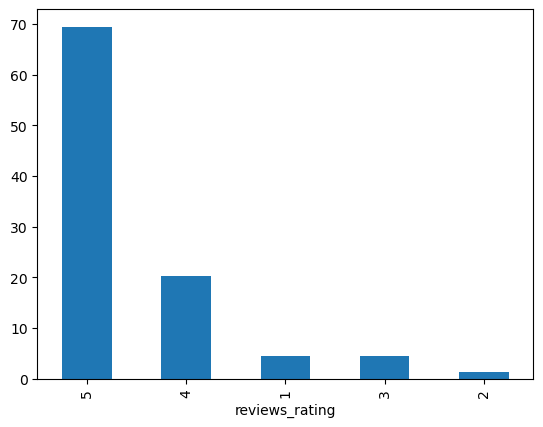

In [67]:
percent_dist = 100 * ebuss_df_clean_updated['reviews_rating'].value_counts()/len(ebuss_df_clean_updated)
percent_dist.plot.bar()
plt.show()

### **Preprocessing the ReviewsTitle and ReviewText**

In [68]:
ebuss_df_clean_updated["reviews_preprocess_text"] = ebuss_df_clean_updated[['reviews_title', 'reviews_text']].agg(' '.join, axis=1).str.lstrip('. ')


In [69]:
#Apply Preprocessing
ebuss_df_clean_updated["reviews_preprocess_text"] = ebuss_df_clean_updated["reviews_preprocess_text"].apply(TextPreProcessing.preprocess)

In [70]:
# Concatenating review title and review text which can be used for further analysis analysis
ebuss_df_clean_updated["reviews_complete_text"] = ebuss_df_clean_updated["reviews_preprocess_text"].apply(TextPreProcessing.lemmatize_text)

In [71]:
ebuss_df_clean_updated.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_preprocess_text,reviews_complete_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",others,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45+00:00,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,1,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphors crazy,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",others,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,1,good good flavor review collected part promotion,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",others,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,Good flavor.,Good,dorothy w,1,good good flavor,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",others,K-Y Love Sensuality Pleasure Gel,2016-01-06 00:00:00+00:00,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,rebecca,0,disappointed read reviews looking buying one couples lubricants ultimately disappointed didnt even live reviews read starters neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked captivating sensation expecting im disappointed paid much lube wont use could use normal personal lubricant less money less mess,disappoint read review look buy one couple lubricant ultimately disappointed do not even live review read starter neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect I m disappoint pay much lube will not use could use normal personal lubricant less money less mess
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",others,K-Y Love Sensuality Pleasure Gel,2016-12-21 00:00:00+00:00,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,0,irritation husband bought gel us gel caused irritation felt like burning skin wouldnt recommend gel,irritation husband buy gel us gel cause irritation feel like burn skin would not recommend gel


In [72]:
ebuss_df_clean_updated.shape


(29255, 13)

In [73]:
Utility.save_object(ebuss_df_clean_updated, 'preprocessed-dataframe')
# Utility.save_dataframe(ebuss_df_clean_updated)

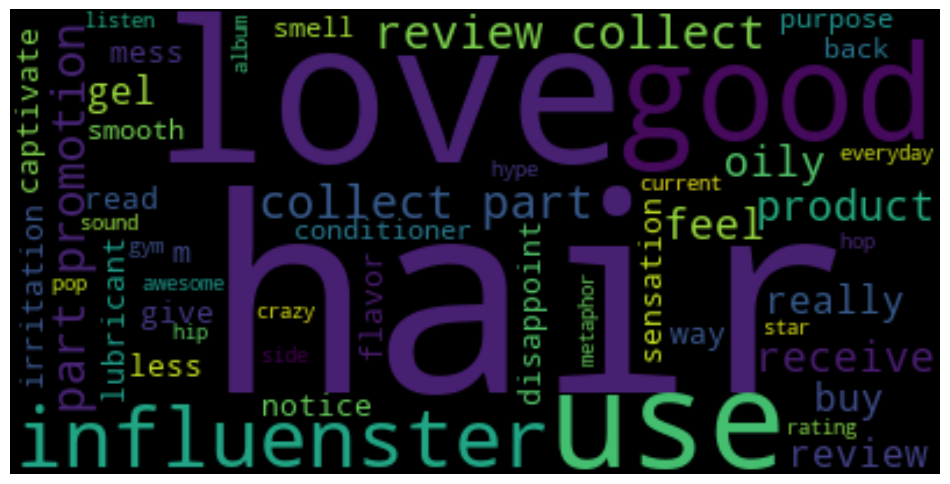

In [74]:
# Create WordCloud to check on Top 50 words
wordcloud = WordCloud(max_words=50, random_state=42)
wordcloud.generate(str(ebuss_df_clean_updated['reviews_complete_text']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [75]:
words_per_review = ebuss_df_clean_updated['reviews_complete_text'].apply(lambda x: len(x.split(" ")))
print('Average words per Review:', round(words_per_review.mean(),2))

Average words per Review: 19.64


In [76]:
#Print the top 10 words in the unigram frequency
common_words = TextPreProcessing.get_top_n_ngram(ebuss_df_clean_updated['reviews_complete_text'], 1, 10)
pd.DataFrame(common_words)

--1 [[1 1 1 ... 1 1 1]]


,0,1
0,great,14689
1,use,13350
2,love,12845
3,product,12438
4,movie,10837
5,review,9409
6,good,8883
7,collect,8770
8,promotion,8748
9,wipe,8375


In [77]:
#Print the top 10 words in the bigram frequency
common_words = TextPreProcessing.get_top_n_ngram(ebuss_df_clean_updated['reviews_complete_text'], 2, 10)
pd.DataFrame(common_words)

--1 [[1 1 1 ... 1 1 1]]


,0,1
0,review collect,8743
1,collect promotion,8743
2,clorox wipe,2846
3,great product,1995
4,great movie,1771
5,easy use,1566
6,love clorox,1233
7,love product,1177
8,use clorox,1108
9,good movie,1083


In [78]:
#Print the top 10 words in the trigram frequency
common_words = TextPreProcessing.get_top_n_ngram(ebuss_df_clean_updated['reviews_complete_text'], 3, 10)
pd.DataFrame(common_words)

--1 [[1 1 1 ... 1 1 1]]


,0,1
0,review collect promotion,8743
1,love clorox wipe,608
2,use clorox wipe,559
3,clorox disinfecting wipe,511
4,clean review collect,443
5,product review collect,430
6,use review collect,363
7,great product love,287
8,great movie great,267
9,clorox wipe love,254


### **Feature extraction & Input and output variable seperation**

In [79]:
# Creating TF-IDF vectorizer, for model building
# Considering all unigram, bigram, trigram words
vectorizer = TfidfVectorizer(max_df=0.95,min_df=5,
                             stop_words='english',
                             tokenizer= word_tokenize,
                             ngram_range=(1,3))

In [80]:
# Fitting the TF-IDF vectorizer on the training set
X_tfidf = vectorizer.fit_transform(ebuss_df_clean_updated['reviews_complete_text'])
y = ebuss_df_clean_updated['user_sentiment']

In [81]:
# Save Vectorizer Object
Utility.save_object(vectorizer, 'tfidf-vectorizer')


In [82]:
# check shape after vectorization
print(X_tfidf.shape)
print(y.shape)

(29255, 20668)
(29255,)


In [83]:
# splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state=42, test_size=0.2)

In [84]:

print("X_train shape =", X_train.shape)
print("X_test shape =", X_test.shape)
print("y_train shape =", y_train.shape)
print("y_test shape =", y_test.shape)

X_train shape = (23404, 20668)
X_test shape = (5851, 20668)
y_train shape = (23404,)
y_test shape = (5851,)


#### **Implementing SMOTE as user_sentiment is imbalanced**

In [85]:
count = Counter(y_train)
print('Before Applying SMOTE:',count)

sm = SMOTE(random_state = 42)

# transform the dataset
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

count = Counter(y_train_sm)
print('After Applying SMOTE:',count)

Before Applying SMOTE: Counter({1: 20976, 0: 2428})
After Applying SMOTE: Counter({1: 20976, 0: 20976})


## **Model Evaluation**

### **1. Logistic Regression with SMOTE**

In [86]:
logit = ModelFactory.LogisticRegressionModel("logistic_regression", X_train_sm, y_train_sm, X_test, y_test)

Train Data Metrics -  logistic_regression
********************
********************
Accuracy: 0.96
Precision: 0.97
Recall: 0.95
F1 Score: 0.96
AUC Score: 0.96
********************
********************


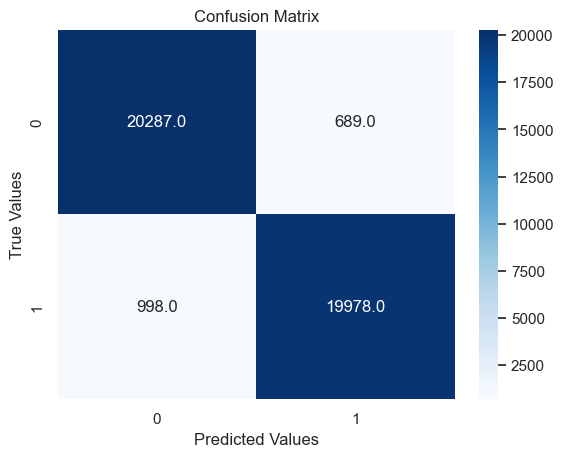

********************
********************


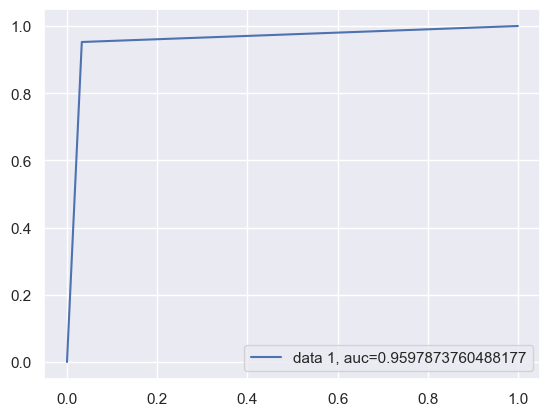

In [87]:
logit.evaluate_train()

Test Data Metrics -  logistic_regression
********************
********************
Accuracy: 0.92
Precision: 0.97
Recall: 0.93
F1 Score: 0.95
AUC Score: 0.85
********************
********************


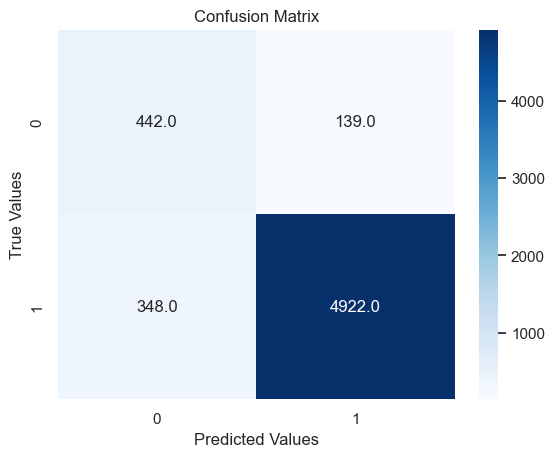

********************
********************


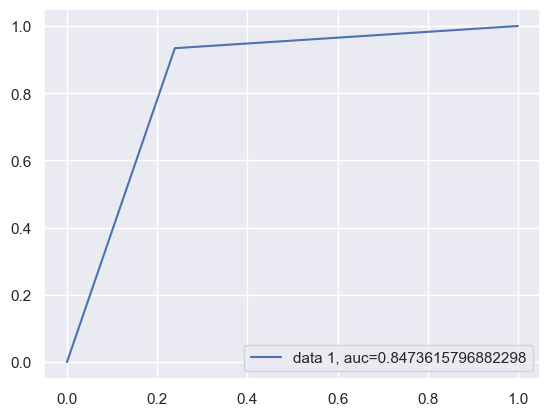

In [88]:
logit.evaluate_test()

In [89]:
Utility.save_model(logit.lr_obj, logit.model_name)

### **2. Multinomial Naive Bayes**

In [90]:
multinomial_nb = ModelFactory.NaiveBayesRegressionModel("multi_naive_bayes_regression", X_train_sm, y_train_sm, X_test, y_test)

Train Data Metrics -  multi_naive_bayes_regression
********************
********************
Accuracy: 0.91
Precision: 0.94
Recall: 0.88
F1 Score: 0.91
AUC Score: 0.91
********************
********************


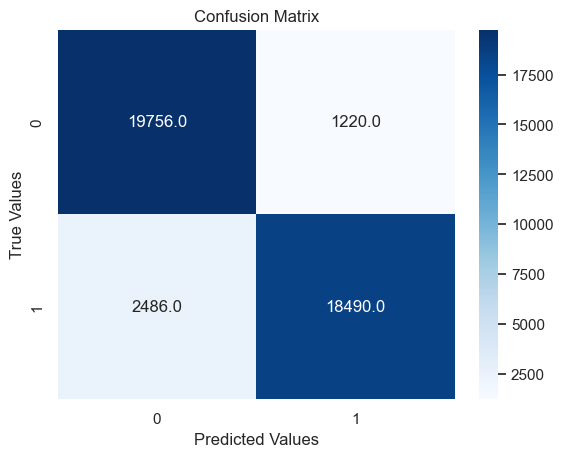

********************
********************


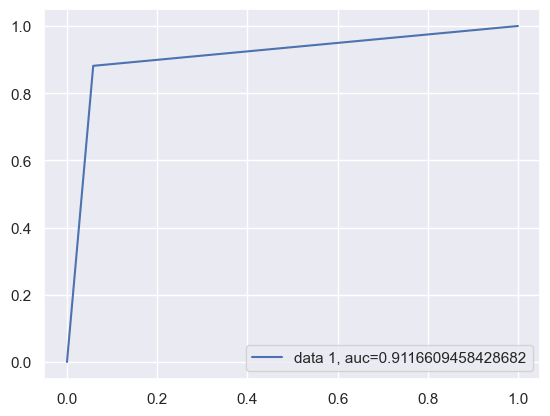

In [91]:
multinomial_nb.evaluate_train()

Test Data Metrics -  multi_naive_bayes_regression
********************
********************
Accuracy: 0.86
Precision: 0.98
Recall: 0.86
F1 Score: 0.92
AUC Score: 0.84
********************
********************


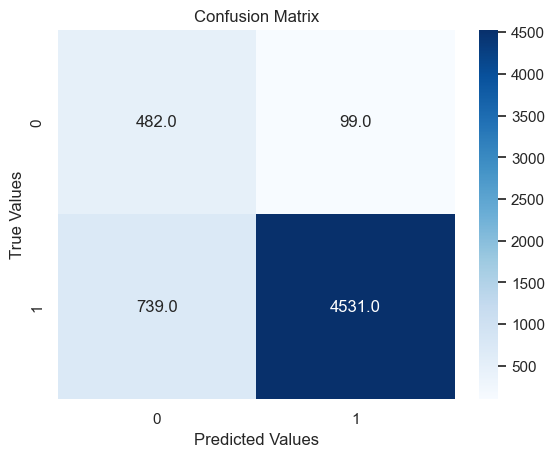

********************
********************


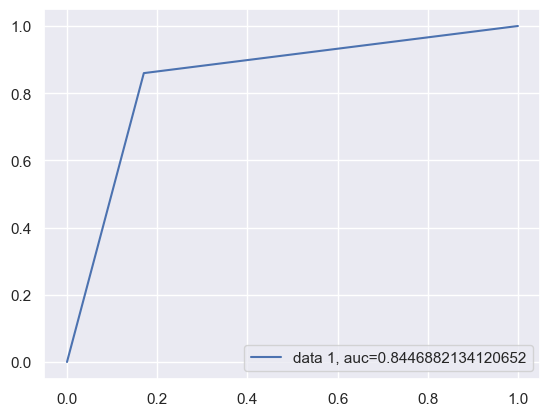

In [92]:
multinomial_nb.evaluate_test()

In [93]:
Utility.save_model(multinomial_nb.nb_obj, multinomial_nb.model_name)

### **3. XGBoost**

In [94]:
xgboost_classifier = ModelFactory.XGBoostRegressionModel("xgboost_classifier", X_train_sm, y_train_sm, X_test, y_test)

Train Data Metrics -  xgboost_classifier
********************
********************
Accuracy: 0.96
Precision: 0.94
Recall: 0.98
F1 Score: 0.96
AUC Score: 0.96
********************
********************


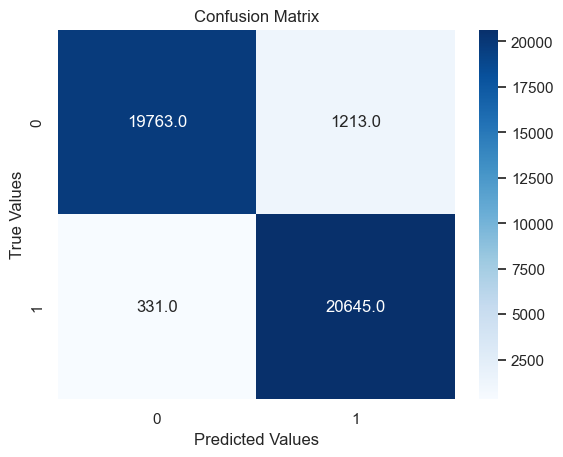

********************
********************


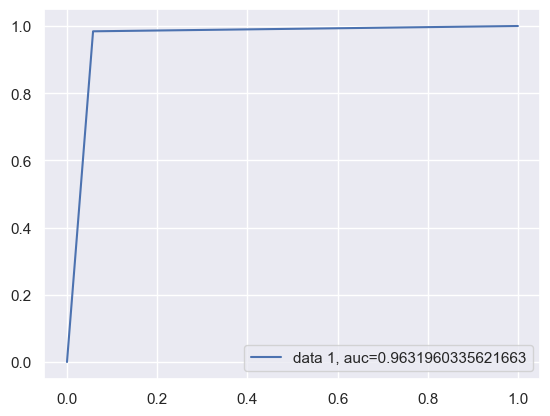

In [95]:
xgboost_classifier.evaluate_train()

Test Data Metrics -  xgboost_classifier
********************
********************
Accuracy: 0.93
Precision: 0.96
Recall: 0.97
F1 Score: 0.96
AUC Score: 0.78
********************
********************


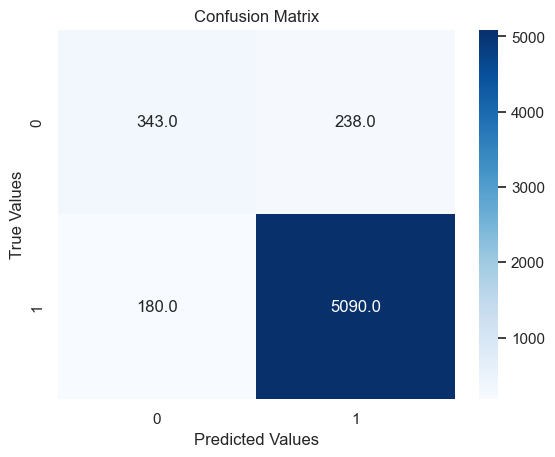

********************
********************


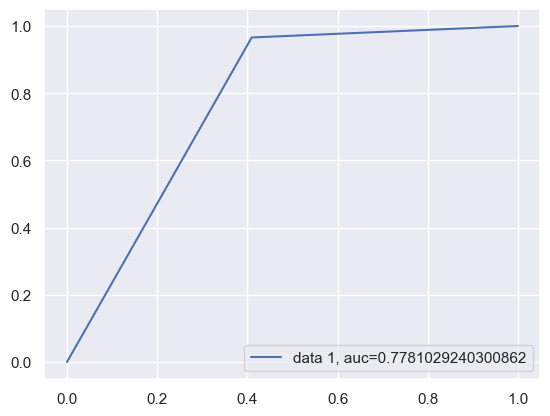

In [96]:
xgboost_classifier.evaluate_test()

In [97]:
Utility.save_model(xgboost_classifier.xgb_c_obj, xgboost_classifier.model_name)

### **4. XGBoost HyperParameter**

In [98]:
xgboost_classifier_hp = ModelFactory.XGBoostRegressionHyperParameterModel("xgboost_classifier_hp", X_train_sm, y_train_sm, X_test, y_test)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


Train Data Metrics -  xgboost_classifier_hp
********************
********************
Accuracy: 0.97
Precision: 0.96
Recall: 0.98
F1 Score: 0.97
AUC Score: 0.97
********************
********************


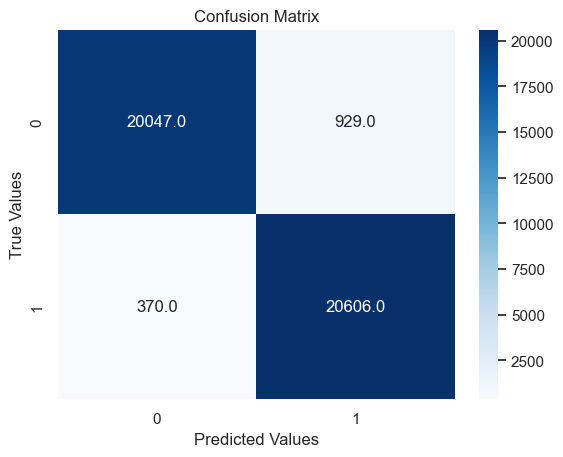

********************
********************


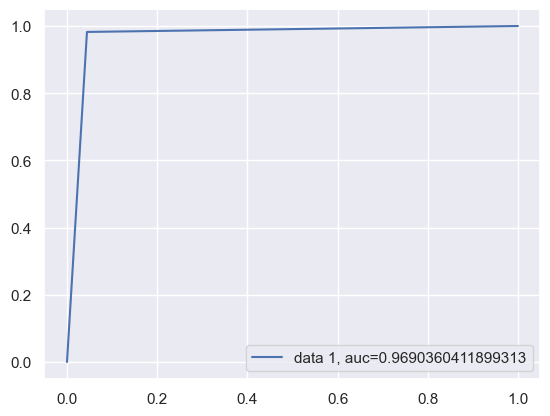

CPU times: user 12.4 s, sys: 5.21 s, total: 17.7 s
Wall time: 4.04 s


In [99]:
%%time
xgboost_classifier_hp.evaluate_train()

Test Data Metrics -  xgboost_classifier_hp
********************
********************
Accuracy: 0.91
Precision: 0.95
Recall: 0.94
F1 Score: 0.95
AUC Score: 0.77
********************
********************


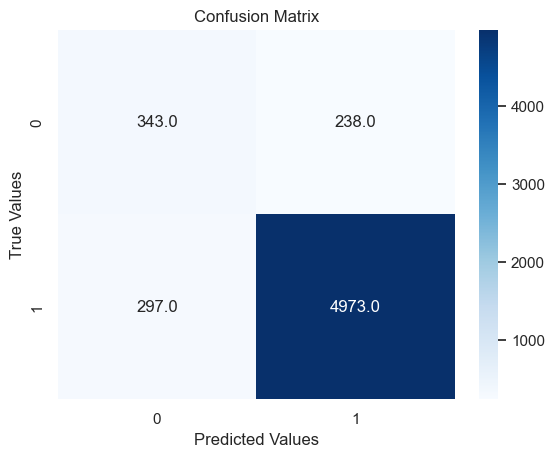

********************
********************


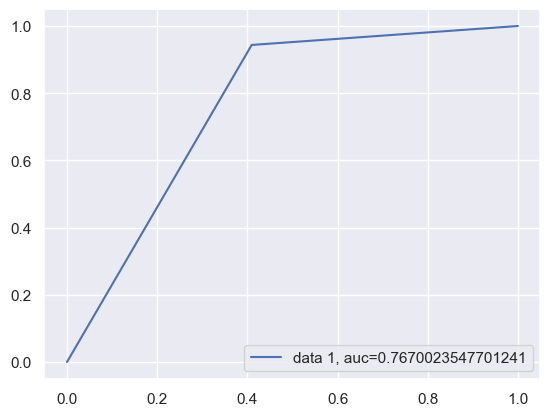

CPU times: user 454 ms, sys: 198 ms, total: 652 ms
Wall time: 119 ms


In [100]:
%%time
xgboost_classifier_hp.evaluate_test()

In [101]:
Utility.save_model(xgboost_classifier_hp.xgb_hp_tuned_obj, xgboost_classifier_hp.model_name)

### **5. Random Forest**

In [102]:
random_forest_classifier = ModelFactory.RandomForestClassifierModel("random_forest_classifier", X_train_sm, y_train_sm, X_test, y_test)


Train Data Metrics -  random_forest_classifier
********************
********************
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC Score: 1.0
********************
********************


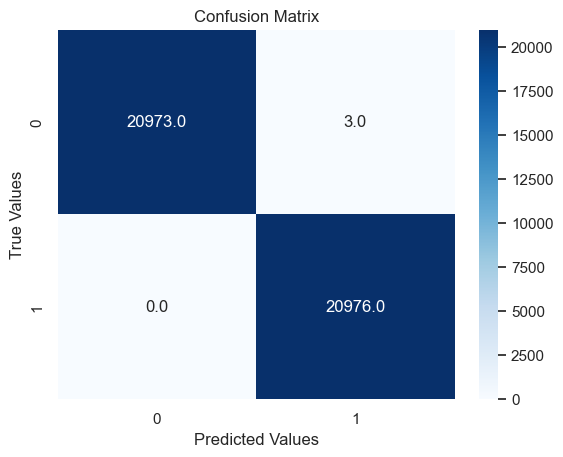

********************
********************


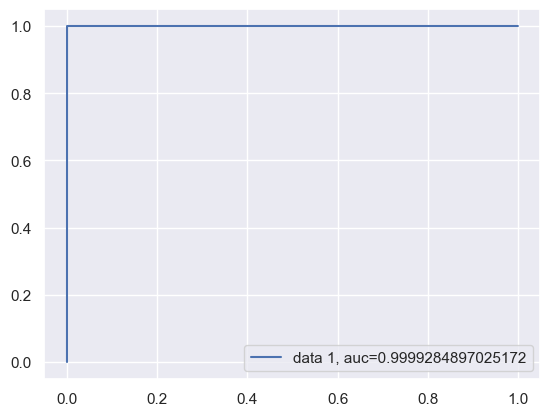

CPU times: user 19 s, sys: 1.77 s, total: 20.8 s
Wall time: 2.09 s


In [103]:
%%time
random_forest_classifier.evaluate_train()

Test Data Metrics -  random_forest_classifier
********************
********************
Accuracy: 0.94
Precision: 0.95
Recall: 0.98
F1 Score: 0.97
AUC Score: 0.76
********************
********************


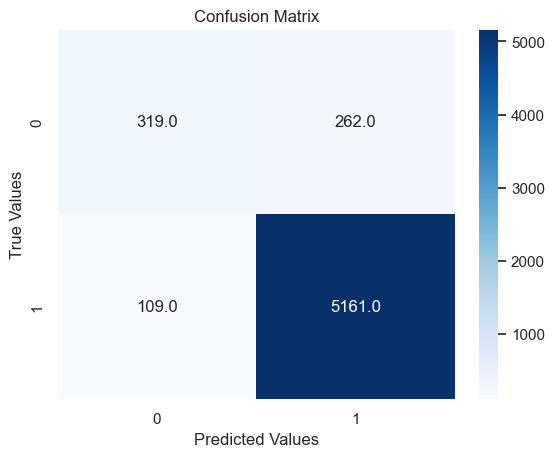

********************
********************


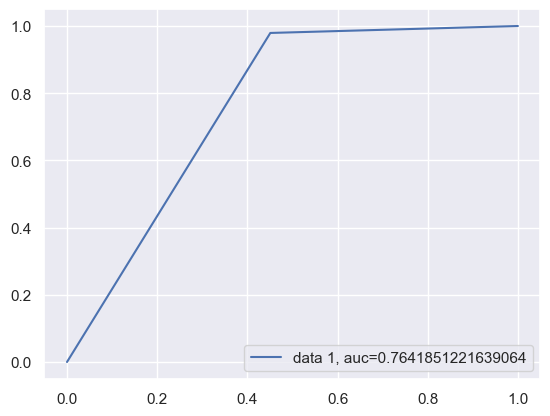

CPU times: user 583 ms, sys: 533 ms, total: 1.12 s
Wall time: 170 ms


In [104]:
%%time
random_forest_classifier.evaluate_test()

In [105]:
Utility.save_model(random_forest_classifier.rf_obj, random_forest_classifier.model_name)

### **6. Random Forest HyperParameter**

In [106]:
random_forest_classifier_hp = ModelFactory.RandomForestClassifierHyperParameterModel("random_forest_classifier_hp", X_train_sm, y_train_sm, X_test, y_test)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


Train Data Metrics -  random_forest_classifier_hp
********************
********************
Accuracy: 0.84
Precision: 0.78
Recall: 0.94
F1 Score: 0.85
AUC Score: 0.84
********************
********************


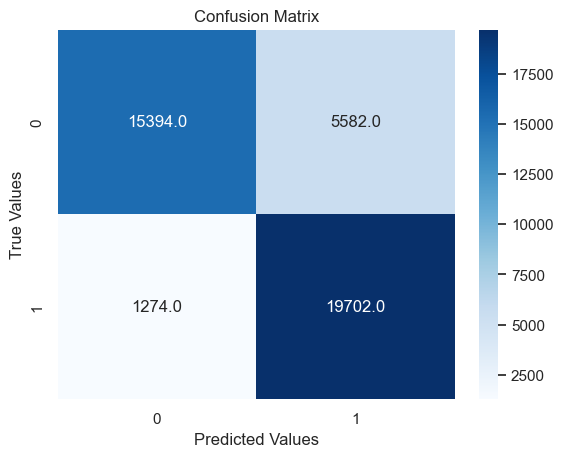

********************
********************


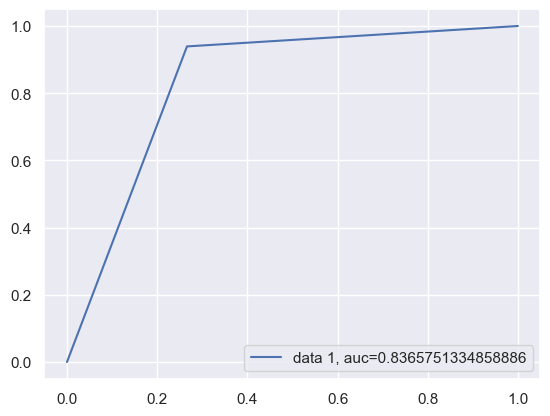

CPU times: user 1.04 s, sys: 36.1 ms, total: 1.08 s
Wall time: 311 ms


In [107]:
%%time
random_forest_classifier_hp.evaluate_train()

Test Data Metrics -  random_forest_classifier_hp
********************
********************
Accuracy: 0.89
Precision: 0.95
Recall: 0.94
F1 Score: 0.94
AUC Score: 0.72
********************
********************


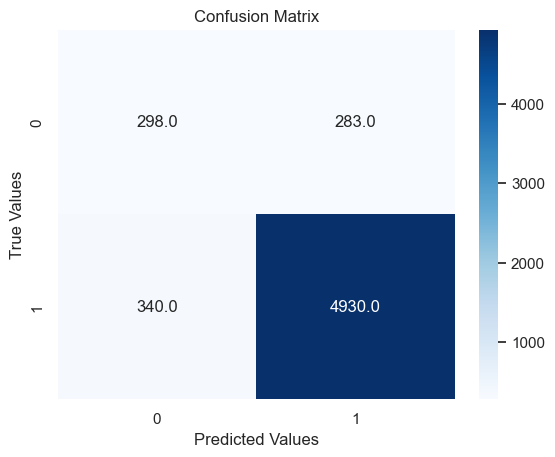

********************
********************


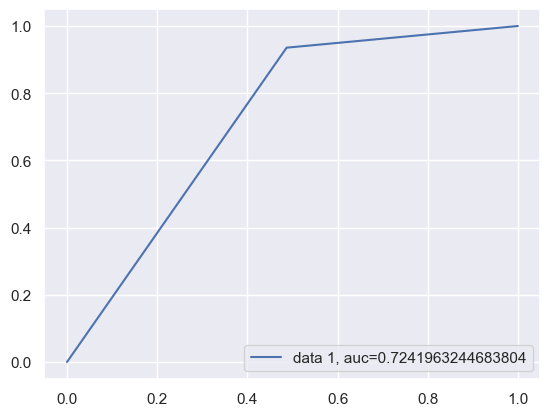

CPU times: user 408 ms, sys: 7.37 ms, total: 416 ms
Wall time: 137 ms


In [108]:
%%time
random_forest_classifier_hp.evaluate_test()

In [109]:
Utility.save_model(random_forest_classifier_hp.rf_hp_tuned_obj, random_forest_classifier_hp.model_name)

### **Metrics of All Classifier models**

In [110]:
# Creating a table which contain all the metrics
column_names = ['Metric','Logistic Regression SMOTE Train', 'Logistic Regression SMOTE Test',
                'Multinomial Naive Bayes Train','Multinomial Naive Bayes Test', 'XGBoost Train', 'XGBoost Test',
                'XGBoost HP Train', 'XGBoost HP Test', 'Random Forest Train', 
                'Random Forest Test', 'Random Forest HP Train', 'Random Forest HP Test']

metrics_summary = {'Metric': ['Accuracy','Precision','Recall', 'F1 Score','AUC Score'],
        'Logistic Regression SMOTE Train': logit.lr_obj.get_train_metrics(),
        'Logistic Regression SMOTE Test': logit.lr_obj.get_test_metrics(),
        'Multinomial Naive Bayes Train': multinomial_nb.nb_obj.get_train_metrics(),
        'Multinomial Naive Bayes Test': multinomial_nb.nb_obj.get_test_metrics(),
        'XGBoost Train': xgboost_classifier.xgb_c_obj.get_train_metrics(),
        'XGBoost Test': xgboost_classifier.xgb_c_obj.get_test_metrics(),
        'XGBoost HP Train': xgboost_classifier_hp.xgb_hp_tuned_obj.get_train_metrics(),
        'XGBoost HP Test': xgboost_classifier_hp.xgb_hp_tuned_obj.get_test_metrics(),
        'Random Forest Train': random_forest_classifier.rf_obj.get_train_metrics(),
        'Random Forest Test': random_forest_classifier.rf_obj.get_test_metrics(),
        'Random Forest HP Train': random_forest_classifier_hp.rf_hp_tuned_obj.get_train_metrics(),
        'Random Forest HP Test': random_forest_classifier_hp.rf_hp_tuned_obj.get_test_metrics(),
        }

metrics_df = pd.DataFrame(metrics_summary, columns = column_names)
metrics_df

,Metric,Logistic Regression SMOTE Train,Logistic Regression SMOTE Test,Multinomial Naive Bayes Train,Multinomial Naive Bayes Test,XGBoost Train,XGBoost Test,XGBoost HP Train,XGBoost HP Test,Random Forest Train,Random Forest Test,Random Forest HP Train,Random Forest HP Test
0,Accuracy,0.96,0.92,0.91,0.86,0.96,0.93,0.97,0.91,1.0,0.94,0.84,0.89
1,Precision,0.97,0.97,0.94,0.98,0.94,0.96,0.96,0.95,1.0,0.95,0.78,0.95
2,Recall,0.95,0.93,0.88,0.86,0.98,0.97,0.98,0.94,1.0,0.98,0.94,0.94
3,F1 Score,0.96,0.95,0.91,0.92,0.96,0.96,0.97,0.95,1.0,0.97,0.85,0.94
4,AUC Score,0.96,0.85,0.91,0.84,0.96,0.78,0.97,0.77,1.0,0.76,0.84,0.72
